# Brill (2016) with Tax-Calculator 

In [122]:
import sys
sys.path.append("../../")
from taxcalc import *
import pandas as pd
import numpy as np
import copy
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.transforms import BlendedGenericTransform
%matplotlib inline

In [123]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [124]:
records_x = Records("../../puf.csv")
params_x = Policy()
records_baseline = Records("../../puf.csv")
params_baseline = Policy()
records_y_std = Records("../../puf.csv")
params_y_std = Policy()
records_y_rates = Records("../../puf.csv")
records_y_rates_low = Records("../../puf.csv")
params_y_rates = Policy()
params_y_rates_low = Policy()
behavior_std = Behavior()
behavior_rates = Behavior()
behavior_rates_low = Behavior()
behavior_x = Behavior()
records_y_rates_high = Records("../../puf.csv")
params_y_rates_high = Policy()
behavior_rates_high = Behavior()


## Implement Reforms

In [125]:
reform_std = {
    2016: {
            '_STD': [[12600, 25200, 12600, 18600, 25300, 12600, 2100]],
            '_AMT_trt1': [.0],
            '_AMT_trt2': [.0]
           },}


reform_rates = {
    2016: {
            '_II_brk2': [[65005, 130010, 65005, 88180, 130010, 65005]],
            '_AMT_trt1': [.0],
            '_AMT_trt2': [.0]
       }, }

reform_rates_low = {
    2016: {
           '_II_brk1': [[27825, 55650, 27825, 39750, 55650, 27825]],
           '_AMT_trt1': [.0],
           '_AMT_trt2': [.0]
       }, }

reform_x = {
    2016: {
            '_AMT_trt1': [.0],
           '_AMT_trt2': [.0]
    },
}

reform_rates_high = {
    2016: {
            '_II_rt5': [.2875],
            '_II_rt7': [.2875],
            '_II_rt6': [.2875],
            '_AMT_trt1': [.0],
            '_AMT_trt2': [.0]
       }, }

params_x.implement_reform(reform_x)
params_y_std.implement_reform(reform_std)
params_y_rates.implement_reform(reform_rates)
params_y_rates_low.implement_reform(reform_rates_low)
params_y_rates_high.implement_reform(reform_rates_high)

### Create Calculators, increment years, calculate taxes

In [126]:
calc_x = Calculator(params_x, records_x, behavior_x)
for i in range(4):
    calc_x.increment_year()
assert calc_x.current_year == 2017

You loaded data for 2009.
Your data have been extrapolated to 2013.


In [127]:
calc_baseline = Calculator(params_baseline, records_baseline)
for i in range(4):
    calc_baseline.increment_year()
assert calc_baseline.current_year == 2017

You loaded data for 2009.
Your data have been extrapolated to 2013.


In [128]:
calc_y_std = Calculator(params_y_std, records_y_std, behavior = behavior_std)
for i in range(4):
    calc_y_std.increment_year()
assert calc_x.current_year == 2017

You loaded data for 2009.
Your data have been extrapolated to 2013.


In [129]:
calc_y_rates = Calculator(params_y_rates, records_y_rates, behavior =  behavior_rates)
for i in range(4):
    calc_y_rates.increment_year()
assert calc_y_rates.current_year == 2017

You loaded data for 2009.
Your data have been extrapolated to 2013.


In [130]:
calc_y_rates_low = Calculator(params_y_rates_low, records_y_rates_low, behavior =  behavior_rates_low)
for i in range(4):
    calc_y_rates_low.increment_year()
assert calc_y_rates_low.current_year == 2017

You loaded data for 2009.
Your data have been extrapolated to 2013.


In [131]:
calc_y_rates_high = Calculator(params_y_rates_high, records_y_rates_high, behavior =  behavior_rates_high)
for i in range(4):
    calc_y_rates_high.increment_year()
assert calc_y_rates_high.current_year == 2017

You loaded data for 2009.
Your data have been extrapolated to 2013.


In [132]:
calc_x.calc_all()
calc_y_std.calc_all()
calc_y_rates.calc_all()
calc_y_rates_low.calc_all()
calc_y_rates_high.calc_all()
calc_baseline.calc_all()

# Static Change. 

### Revenue Change (billions)

In [133]:
calc_x_combined = (calc_x.records._combined * calc_x.records.s006).sum()
calc_y_std_combined = (calc_y_std.records._combined * calc_y_std.records.s006).sum()
calc_y_rates_combined = (calc_y_rates.records._combined * calc_y_rates.records.s006).sum()
calc_y_rates_low_combined = (calc_y_rates_low.records._combined * calc_y_rates_low.records.s006).sum()
calc_y_rates_high_combined = (calc_y_rates_high.records._combined * calc_y_rates_high.records.s006).sum()
std_rev_diff_static = (calc_y_std_combined - calc_x_combined)/1000000000
rates_rev_diff_static = (calc_y_rates_combined - calc_x_combined)/1000000000
rates_low_rev_diff_static = (calc_y_rates_low_combined - calc_x_combined)/1000000000
rates_high_rev_diff_static = (calc_y_rates_high_combined - calc_x_combined)/1000000000
print std_rev_diff_static
print rates_rev_diff_static
print rates_low_rev_diff_static
print rates_high_rev_diff_static


-99.2837104996
-107.849214469
-97.1361587879
-105.427207743


# Create Behavioral Calculators

In [134]:
behavior_std.update_behavior({2017: {'_BE_inc': [0], '_BE_sub': [0.3]}})
behavior_rates.update_behavior({2017: {'_BE_inc': [0], '_BE_sub': [0.3]}})
behavior_rates_low.update_behavior({2017: {'_BE_inc': [0], '_BE_sub': [0.3]}})
behavior_x.update_behavior({2017: {'_BE_inc': [0], '_BE_sub': [0.3]}})
behavior_rates_high.update_behavior({2017: {'_BE_inc': [0], '_BE_sub': [0.3]}})

Note that I include behavior when we repeal the AMT. 

In [135]:
calc_x = behavior(calc_baseline, calc_x)
calc_y_std_beh = behavior(calc_x, calc_y_std)
calc_y_rates_beh = behavior(calc_x, calc_y_rates)
calc_y_rates_low_beh = behavior(calc_x, calc_y_rates_low)
calc_y_rates_high_beh = behavior(calc_x, calc_y_rates_high)
calc_y_std_beh.calc_all()
calc_y_rates_beh.calc_all()
calc_y_rates_low_beh.calc_all()
calc_y_rates_high_beh.calc_all()

# Behavioral Change


### Revenue change (billions)

In [136]:
calc_x_combined = (calc_x.records._combined * calc_x.records.s006)
calc_y_std_beh_combined = (calc_y_std_beh.records._combined * calc_y_std_beh.records.s006)
calc_y_rates_beh_combined = (calc_y_rates_beh.records._combined * calc_y_rates_beh.records.s006)
calc_y_rates_low_beh_combined = (calc_y_rates_low_beh.records._combined * calc_y_rates_beh.records.s006)
calc_y_rates_high_beh_combined = (calc_y_rates_high_beh.records._combined * calc_y_rates_high_beh.records.s006)
rev_diff_std = (calc_y_std_beh_combined - calc_x_combined).sum()/1000000000
rev_diff_rates = (calc_y_rates_beh_combined - calc_x_combined).sum()/1000000000
rev_diff_rates_low = (calc_y_rates_low_beh_combined - calc_x_combined).sum()/1000000000
rev_diff_rates_high = (calc_y_rates_high_beh_combined - calc_x_combined).sum()/1000000000
print rev_diff_std
print rev_diff_rates
print rev_diff_rates_low
print rev_diff_rates_high

-94.5604514586
-94.8804773821
-94.0380911162
-72.2097011449


###    # Tax cut (millions)

In [137]:
num_tax_cut_std = calc_x.records.s006[calc_x.records._combined > calc_y_std_beh.records._combined + .0001].sum()
num_tax_cut_rates = calc_x.records.s006[calc_x.records._combined > calc_y_rates_beh.records._combined + .00001].sum()
num_tax_cut_rates_low = calc_x.records.s006[calc_x.records._combined > calc_y_rates_low_beh.records._combined + .00001].sum()
print num_tax_cut_std/1000000
print num_tax_cut_rates/1000000
print num_tax_cut_rates_low/1000000

86.3201124221
34.7611245553
83.7762158179


### # Tax cut if 20k < AGI < 200k (millions)

In [138]:
num_tax_cut_std_MI = calc_x.records.s006[(calc_x.records._combined > calc_y_std_beh.records._combined + .0001) &
                                         (calc_x.records.c00100>20000) &
                                         (calc_x.records.c00100<200000)].sum()
num_tax_cut_rates_MI = calc_x.records.s006[(calc_x.records._combined > calc_y_rates_beh.records._combined + .00001)  &
                                         (calc_x.records.c00100>20000) &
                                         (calc_x.records.c00100<200000)].sum()
num_tax_cut_rates_low_MI = calc_x.records.s006[(calc_x.records._combined > calc_y_rates_low_beh.records._combined + .00001)  &
                                         (calc_x.records.c00100>20000) &
                                         (calc_x.records.c00100<200000)].sum()
print num_tax_cut_std_MI/1000000
print num_tax_cut_rates_MI/1000000
print num_tax_cut_rates_low_MI/1000000

72.9253826453
27.3498854844
75.8089487903


### %Tax cut

In [139]:
num_total_filers = calc_x.records.s006.sum()
pct_cut_std = num_tax_cut_std/num_total_filers
pct_cut_rates = num_tax_cut_rates/num_total_filers
pct_cut_rates_low = num_tax_cut_rates_low/num_total_filers
print pct_cut_std
print pct_cut_rates
print pct_cut_rates_low

0.500696676263
0.201630640179
0.485940896425


### Itemizers after reforms (millions)

In [140]:
num_total_itemizers_x = calc_x.records.s006[((calc_x.records.c04470 > 0) &
                                             (calc_x.records.c00100 > 0))].sum() 
num_total_itemizers_std = calc_x.records.s006[((calc_y_std_beh.records.c04470 > 0) &
                                               (calc_y_std_beh.records.c00100 > 0))].sum() 
num_total_itemizers_rates = calc_x.records.s006[((calc_y_rates_beh.records.c04470 > 0) &
                                                 (calc_y_rates_beh.records.c00100 > 0))].sum() 
num_total_itemizers_rates_low = calc_x.records.s006[((calc_y_rates_low_beh.records.c04470 > 0) &
                                                     (calc_y_rates_low_beh.records.c00100 > 0))].sum() 

print num_total_itemizers_std/1000000
print num_total_itemizers_rates/1000000
print num_total_itemizers_rates_low/1000000

24.7015676289
45.811973378
45.8177395141


### Itemizers after standard deduction reform AGI > 200k (millions)

In [141]:
print calc_x.records.s006[((calc_y_std_beh.records.c04470 > 0) & (calc_y_std_beh.records.c00100 > 200000))].sum()/1000000

6.34756518008


### Itemizers after standard deduction reform AGI > 100k (millions)

In [142]:
print calc_x.records.s006[((calc_y_std_beh.records.c04470 > 0) & (calc_y_std_beh.records.c00100 > 100000))].sum()/1000000

15.394385215


### Delta itemizers (millions)

In [143]:

itemizers_diff_std = num_total_itemizers_std - num_total_itemizers_x
itemizers_diff_rates = num_total_itemizers_rates - num_total_itemizers_x
itemizers_diff_rates_low = num_total_itemizers_rates_low - num_total_itemizers_x

print itemizers_diff_std/1000000
print itemizers_diff_rates/1000000
print itemizers_diff_rates_low/1000000

-21.1247482553
-0.0143425061661
-0.00857637010686


### Itemizers after reforms 20k < AGI < 200k(millions)

In [144]:
num_total_itemizers_x_MI = calc_x.records.s006[((calc_x.records.c04470 > 0) &
                                             (calc_x.records.c00100 > 0) &
                                             (calc_x.records.c00100>20000) &
                                             (calc_x.records.c00100<200000))].sum() 
num_total_itemizers_std_MI = calc_x.records.s006[((calc_y_std_beh.records.c04470 > 0) &
                                               (calc_y_std_beh.records.c00100 > 0)  &
                                               (calc_x.records.c00100>20000) &
                                               (calc_x.records.c00100<200000))].sum() 
num_total_itemizers_rates_MI = calc_x.records.s006[((calc_y_rates_beh.records.c04470 > 0) &
                                                 (calc_y_rates_beh.records.c00100 > 0) &
                                                 (calc_x.records.c00100>20000) &
                                                 (calc_x.records.c00100<200000))].sum() 
num_total_itemizers_rates_low_MI = calc_x.records.s006[((calc_y_rates_low_beh.records.c04470 > 0) &
                                                     (calc_y_rates_low_beh.records.c00100 > 0)  &
                                                     (calc_x.records.c00100>20000) &
                                                     (calc_x.records.c00100<200000))].sum() 

print num_total_itemizers_std_MI/1000000
print num_total_itemizers_rates_MI/1000000
print num_total_itemizers_rates_low_MI/1000000

18.1794168708
37.5270141121
37.5326006717


### Delta itemizers 20k < AGI < 200k (millions)

In [145]:

itemizers_diff_std_MI = num_total_itemizers_std_MI - num_total_itemizers_x_MI
itemizers_diff_rates_MI = num_total_itemizers_rates_MI - num_total_itemizers_x_MI
itemizers_diff_rates_low_MI = num_total_itemizers_rates_low_MI - num_total_itemizers_x_MI

print itemizers_diff_std_MI/1000000
print itemizers_diff_rates_MI/1000000
print itemizers_diff_rates_low_MI/1000000

-19.3617601711
-0.0141629297075
-0.00857637010685


### Delta AMT filers (millions)

In [146]:
num_total_amt_filers_x = calc_x.records.s006[calc_x.records.c09600 > 0].sum()
num_total_amt_filers_std = calc_x.records.s006[calc_y_std_beh.records.c09600>0].sum()
num_total_amt_filers_rates = calc_x.records.s006[calc_y_rates_beh.records.c09600>0].sum()
num_total_amt_filers_rates_low = calc_x.records.s006[calc_y_rates_low_beh.records.c09600>0].sum()

amt_filers_diff_std = num_total_amt_filers_std - num_total_amt_filers_x
amt_filers_diff_rates = num_total_amt_filers_rates - num_total_amt_filers_x
amt_filers_diff_rates_low = num_total_amt_filers_rates_low - num_total_amt_filers_x

print amt_filers_diff_std/1000000
print amt_filers_diff_rates/1000000
print amt_filers_diff_rates_low/1000000

0.0
0.0
0.0


### Delta AMT liability (billions)

In [147]:
total_amt_x = (calc_x.records.s006 * calc_x.records.c09600).sum()
total_amt_std = (calc_y_std_beh.records.s006 * calc_y_std_beh.records.c09600).sum()
total_amt_rates = (calc_y_rates_beh.records.s006 * calc_y_rates_beh.records.c09600).sum()
total_amt_rates_low = (calc_y_rates_low_beh.records.s006 * calc_y_rates_low_beh.records.c09600).sum()

amt_diff_std = total_amt_std - total_amt_x
amt_diff_rates = total_amt_rates - total_amt_x
amt_diff_rates_low = total_amt_rates_low - total_amt_x

print amt_diff_std/1000000000
print amt_diff_rates/1000000000
print amt_diff_rates_low/1000000000

0.0
0.0
0.0


### # Taxpayers with primary earner's wage/salary earnings marginal tax rates (FICA + IIT) lower by more than 100th of a percent (millions)

##### Alex, this is a bit confusing to me. I think what is happening is that a lot of people's total income falls below the new std deduction and so when we add a penny to their income they are still able to deduct everything. 

In [148]:
mtr_fica_x, mtr_iit_x, mtr_combined_x = calc_x.mtr()
mtr_fica_std, mtr_iit_std, mtr_combined_std = calc_y_std.mtr()
mtr_fica_rates, mtr_iit_rates, mtr_combined_rates = calc_y_rates.mtr()
mtr_fica_rates_low, mtr_iit_rates_low, mtr_combined_rates_low = calc_y_rates_low.mtr()
mtr_fica_rates_high, mtr_iit_rates_high, mtr_combined_rates_high = calc_y_rates_high.mtr()

In [149]:
num_mtr_cut_std = calc_x.records.s006[mtr_combined_x > mtr_combined_std + .0001].sum()
num_mtr_cut_rates = calc_x.records.s006[mtr_combined_x > mtr_combined_rates + .0001].sum()
num_mtr_cut_rates_low = calc_x.records.s006[mtr_combined_x > mtr_combined_rates_low + .0001].sum()
print num_mtr_cut_std/1000000
print num_mtr_cut_rates/1000000
print num_mtr_cut_rates_low/1000000

38.6069332154
22.9009422202
33.776802296


### # Taxpayers with primary earner's wage/salary earnings marginal tax rates (FICA + IIT)
### lower by more than 100th of a percent 
### 20K < AGI < 200k (millions)

In [150]:
num_mtr_cut_std_MI = calc_x.records.s006[(mtr_combined_x > mtr_combined_std + .0001) &
                                             (calc_x.records.c00100>20000) &
                                             (calc_x.records.c00100<200000)].sum()
num_mtr_cut_rates_MI = calc_x.records.s006[(mtr_combined_x > mtr_combined_rates + .0001) &
                                             (calc_x.records.c00100>20000) &
                                             (calc_x.records.c00100<200000)].sum()
num_mtr_cut_rates_low_MI = calc_x.records.s006[(mtr_combined_x > mtr_combined_rates_low + .0001) &
                                             (calc_x.records.c00100>20000) &
                                             (calc_x.records.c00100<200000)].sum()
print num_mtr_cut_std_MI/1000000
print num_mtr_cut_rates_MI/1000000
print num_mtr_cut_rates_low_MI/1000000

28.8602654299
22.648725494
33.19620739


### # Taxpayers with a 0% Individual Income Tax mtr

In [151]:
num_iit_mtr_zero_x = calc_x.records.s006[mtr_iit_x == 0].sum()
num_iit_mtr_zero_std = calc_x.records.s006[mtr_iit_std == 0].sum()
num_iit_mtr_zero_rates = calc_x.records.s006[mtr_iit_rates == 0].sum()
num_iit_mtr_zero_rates_low = calc_x.records.s006[mtr_iit_rates_low == 0].sum()

print num_iit_mtr_zero_x/1000000
print num_iit_mtr_zero_std/1000000
print num_iit_mtr_zero_rates/1000000
print num_iit_mtr_zero_rates_low/1000000

31.651417206
41.1502130237
31.6670697292
31.974908001


### Average MTR on wage inome for primary earners (FICA + IIT) 
##### This makes a bit more sense. 

In [152]:
avg_mtr_combined_x = ((mtr_combined_x * calc_x.records.c00100 * calc_x.records.s006).sum()/
                      (calc_x.records.c00100 * calc_x.records.s006).sum())
avg_mtr_combined_std = ((mtr_combined_std * calc_x.records.c00100 * calc_x.records.s006).sum()/
                        (calc_x.records.c00100 * calc_x.records.s006).sum())
avg_mtr_combined_rates = ((mtr_combined_rates * calc_x.records.c00100 * calc_x.records.s006).sum()/
                          (calc_x.records.c00100 * calc_x.records.s006).sum())
avg_mtr_combined_rates_low = ((mtr_combined_rates_low * calc_x.records.c00100 * calc_x.records.s006).sum()/
                              (calc_x.records.c00100 * calc_x.records.s006).sum())
avg_mtr_combined_rates_high = ((mtr_combined_rates_high * calc_x.records.c00100 * calc_x.records.s006).sum()/
                              (calc_x.records.c00100 * calc_x.records.s006).sum())
print avg_mtr_combined_x
print avg_mtr_combined_std
print avg_mtr_combined_rates
print avg_mtr_combined_rates_low
print avg_mtr_combined_rates_high


0.362062734667
0.352144196182
0.341043780964
0.353948182846
0.341350384255


### Difference in avg MTR between plan X and plan Y

In [153]:
diff_avg_mtr_combined_std = avg_mtr_combined_x - avg_mtr_combined_std
diff_avg_mtr_combined_rates = avg_mtr_combined_x - avg_mtr_combined_rates
diff_avg_mtr_combined_rates_low = avg_mtr_combined_x - avg_mtr_combined_rates_low
diff_avg_mtr_combined_rates_high = avg_mtr_combined_x - avg_mtr_combined_rates_high

print diff_avg_mtr_combined_std
print diff_avg_mtr_combined_rates
print diff_avg_mtr_combined_rates_low
print diff_avg_mtr_combined_rates_high

0.00991853848568
0.0210189537036
0.00811455182157
0.0207123504128


### GDP effect in the following year using Barro and Redlick 2011

In [154]:
gdp_effect_BR_std = diff_avg_mtr_combined_std * .54
gdp_effect_BR_rates = diff_avg_mtr_combined_rates * .54
gdp_effect_BR_rates_low = diff_avg_mtr_combined_rates_low * .54
gdp_effect_BR_rates_high = diff_avg_mtr_combined_rates_high * .54

print gdp_effect_BR_std
print gdp_effect_BR_rates
print gdp_effect_BR_rates_low
print gdp_effect_BR_rates_high

0.00535601078227
0.0113502349999
0.00438185798365
0.0111846692229


### Taxpayers with 20K < AGI < 200k

In [155]:
num_middle_income = calc_x.records.s006[
                                      (calc_x.records.c00100>20000) &
                                      (calc_x.records.c00100<200000)].sum()

print num_middle_income/1000000

96.5353118202


### # taxpayers paying federal individual income tax < = 0
##### Note that these numbers are quite a bit lower than TPC's (75mm, 2015). I'm not sure why yet but am looking into it (I think it might have something to do with filers/non-filers). Perhaps just use the deltas for now since the totals are extremely newsworthy (...47%) 

In [156]:
num_no_iit_x = calc_x.records.s006[(calc_x.records._iitax <=0)].sum()
num_no_iit_std = calc_x.records.s006[calc_y_std_beh.records._iitax <=0].sum()
num_no_iit_rates = calc_x.records.s006[calc_y_rates_beh.records._iitax <=0].sum()
num_no_iit_rates_low = calc_x.records.s006[calc_y_rates_low_beh.records._iitax <=0].sum()
print num_no_iit_x/1000000
print num_no_iit_std/1000000
print num_no_iit_rates/1000000
print num_no_iit_rates_low/1000000

70.3927673184
80.4484397919
70.4580388962
71.2500178479


### # diff taxpayers paying federal individual income tax <= 0 (millions)

In [157]:
diff_num_no_iit_std = (num_no_iit_std - num_no_iit_x)/1000000
diff_num_no_iit_rates = (num_no_iit_rates - num_no_iit_x)/1000000
diff_num_no_iit_rates_low = (num_no_iit_rates_low - num_no_iit_x)/1000000
print diff_num_no_iit_std
print diff_num_no_iit_rates
print diff_num_no_iit_rates_low

10.0556724735
0.0652715777367
0.857250529457


### # taxpayers paying federal individual income tax < = 0    
### 20k< AGI < 200k

In [158]:
num_no_iit_x_MI = calc_x.records.s006[(calc_x.records._iitax <=0) &
                                      (calc_x.records.c00100>20000) &
                                      (calc_x.records.c00100<200000)].sum()
num_no_iit_std_MI = calc_x.records.s006[(calc_y_std_beh.records._iitax <=0)&
                                        (calc_x.records.c00100>20000) &
                                        (calc_x.records.c00100<200000)].sum()
num_no_iit_rates_MI = calc_x.records.s006[(calc_y_rates_beh.records._iitax <=0)&
                                        (calc_x.records.c00100>20000) &
                                        (calc_x.records.c00100<200000)].sum()
num_no_iit_rates_low_MI = calc_x.records.s006[(calc_y_rates_low_beh.records._iitax <=0)&
                                             (calc_x.records.c00100>20000) &
                                             (calc_x.records.c00100<200000)].sum()
print num_no_iit_x_MI/1000000
print num_no_iit_std_MI/1000000
print num_no_iit_rates_MI/1000000
print num_no_iit_rates_low_MI/1000000

14.8183167503
20.0573622194
14.8835883281
15.6755672798


### # diff taxpayers paying federal individual income tax <= 0 (millions)  20k < AGI < 200k


In [159]:
diff_num_no_iit_std_MI = (num_no_iit_std_MI - num_no_iit_x_MI)/1000000
diff_num_no_iit_rates_MI = (num_no_iit_rates_MI - num_no_iit_x_MI)/1000000
diff_num_no_iit_rates_low_MI = (num_no_iit_rates_low_MI - num_no_iit_x_MI)/1000000
print diff_num_no_iit_std_MI
print diff_num_no_iit_rates_MI
print diff_num_no_iit_rates_low_MI

5.23904546903
0.0652715777367
0.857250529457


### taxpayers paying federal individual income tax < 0 (millions)
##### Again, I'd suggest not reporting these numbers and only reporting the diffs

In [160]:
num_neg_iit_x = calc_x.records.s006[calc_x.records._iitax <0].sum()
num_neg_iit_std = calc_x.records.s006[calc_y_std_beh.records._iitax <0].sum()
num_neg_iit_rates = calc_x.records.s006[calc_y_rates_beh.records._iitax <0].sum()
num_neg_iit_rates_low = calc_x.records.s006[calc_y_rates_low_beh.records._iitax <0].sum()
print num_neg_iit_x/1000000
print num_neg_iit_std/1000000
print num_neg_iit_rates/1000000
print num_neg_iit_rates_low/1000000

41.0258137293
45.6991284598
41.0897773716
41.8159891859


### # diff taxpayers paying federal individual income tax < 0 (millions)

In [161]:
diff_num_neg_iit_std = (num_neg_iit_std - num_neg_iit_x)/1000000
diff_num_neg_iit_rates = (num_neg_iit_rates - num_neg_iit_x)/1000000
diff_num_neg_iit_rates_low = (num_neg_iit_rates_low - num_neg_iit_x)/1000000
print diff_num_neg_iit_std
print diff_num_neg_iit_rates
print diff_num_neg_iit_rates_low

4.6733147305
0.0639636423281
0.790175456584


### taxpayers paying federal individual income tax < 0 (millions) 
### 20k < AGI < 200k

In [162]:
num_neg_iit_x_MI = calc_x.records.s006[(calc_x.records._iitax <0) &
                                    (calc_x.records.c00100>20000) &
                                    (calc_x.records.c00100<200000)].sum()
num_neg_iit_std_MI = calc_x.records.s006[(calc_y_std_beh.records._iitax <0) &
                                      (calc_x.records.c00100>20000) &
                                      (calc_x.records.c00100<200000)].sum()
num_neg_iit_rates_MI = calc_x.records.s006[(calc_y_rates_beh.records._iitax <0) &
                                        (calc_x.records.c00100>20000) &
                                        (calc_x.records.c00100<200000)].sum()
num_neg_iit_rates_low_MI = calc_x.records.s006[(calc_y_rates_low_beh.records._iitax <0) &
                                            (calc_x.records.c00100>20000) &
                                            (calc_x.records.c00100<200000)].sum()
print num_neg_iit_x_MI/1000000
print num_neg_iit_std_MI/1000000
print num_neg_iit_rates_MI/1000000
print num_neg_iit_rates_low_MI/1000000

12.9022074646
15.5851459054
12.966171107
13.6923829212


### # diff taxpayers paying federal individual income tax < 0 (millions)
### 20k < AGI < 200k

In [163]:
diff_num_neg_iit_std_MI = (num_neg_iit_std_MI - num_neg_iit_x_MI)/1000000
diff_num_neg_iit_rates_MI = (num_neg_iit_rates_MI - num_neg_iit_x_MI)/1000000
diff_num_neg_iit_rates_low_MI = (num_neg_iit_rates_low_MI - num_neg_iit_x_MI)/1000000
print diff_num_neg_iit_std_MI
print diff_num_neg_iit_rates_MI
print diff_num_neg_iit_rates_low_MI

2.68293844076
0.0639636423281
0.790175456584


### MTR Skyline joint taxpayer w 2 kids -- only iit, current law

In [164]:
records_simple_x = Records('../../simple_payer_joint.csv', consider_imputations=False, start_year=2016)
params_simple_x = Policy()
params_simple_x.set_year(2016)
calc_simple_x = Calculator(params_simple_x, records_simple_x, sync_years=False)
assert calc_simple_x.current_year == 2016
calc_simple_x.calc_all()

In [165]:
a,mtr_simple_x,c = calc_simple_x.mtr()

(0, 300000)

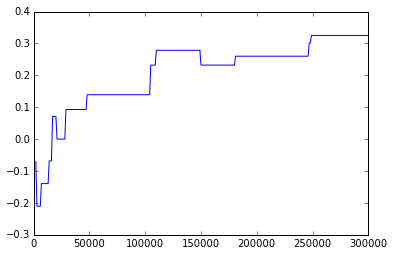

In [166]:
plt.plot(calc_simple_x.records.c00100, mtr_simple_x)
axes = plt.gca()
axes.set_xlim([0,300000])


### MTR skyline single taxpayer w 0 kids -- only iit, current law

In [167]:
records_simple_x = Records('../../simple_payer_single.csv', consider_imputations=False, start_year=2016)
params_simple_x = Policy()
params_simple_x.set_year(2016)
calc_simple_x = Calculator(params_simple_x, records_simple_x, sync_years=False)
assert calc_simple_x.current_year == 2016
calc_simple_x.calc_all()

In [168]:
a,mtr_simple_x,c = calc_simple_x.mtr()

(0, 300000)

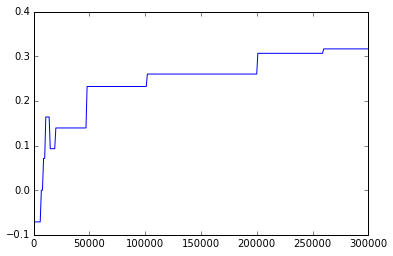

In [169]:
plt.plot(calc_simple_x.records.c00100, mtr_simple_x)
axes = plt.gca()
axes.set_xlim([0,300000])


### MTR Skyline single taxpayer w 1 kid, combined, no AMT

In [170]:
records_simple_x = Records('../../simple_payer.csv')
params_simple_x = Policy()

records_simple_std = Records('../../simple_payer.csv')
params_simple_std = Policy()

reform_simple_x = {
    2016: {
            '_AMT_trt1': [.0],
           '_AMT_trt2': [.0]
    },
}


reform_simple_std = {
    2016: {
            '_STD': [[12600, 25200, 12600, 18600, 25300, 12600, 2100]],
            '_AMT_trt1': [.0],
            '_AMT_trt2': [.0]
           },}

params_simple_x.implement_reform(reform_simple_x)
calc_simple_x = Calculator(params_simple_x, records_simple_x)
for i in range(4):
    calc_simple_x.increment_year()
assert calc_simple_x.current_year == 2017
calc_simple_x.calc_all()

params_simple_std.implement_reform(reform_simple_std)
calc_simple_std = Calculator(params_simple_std, records_simple_std)
for i in range(4):
    calc_simple_std.increment_year()
assert calc_simple_std.current_year == 2017
calc_simple_std.calc_all()

You loaded data for 2009.
Your data have been extrapolated to 2013.
You loaded data for 2009.
Your data have been extrapolated to 2013.


In [171]:
a,b,mtr_simple_x = calc_simple_x.mtr()
a,b,mtr_simple_std = calc_simple_std.mtr()

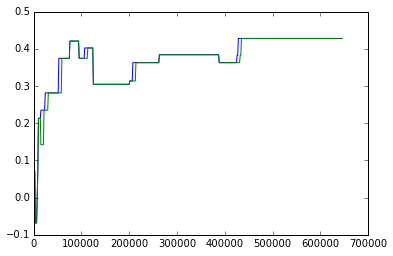

In [172]:
plt.plot(calc_simple_x.records.e00200, mtr_simple_x)
plt.plot(calc_simple_std.records.e00200, mtr_simple_std)

### MTR Skyline charts including iit_mtr<=0

In [173]:
RES_COLUMNS = STATS_COLUMNS + ['e00200'] + ['MARS'] + ['n24']
def results(c):
    outputs = []
    for col in RES_COLUMNS:
        if hasattr(c.policy, col):
            outputs.append(getattr(c.policy, col))
        else:
            outputs.append(getattr(c.records, col))

    return DataFrame(data=np.column_stack(outputs), columns=RES_COLUMNS)


EPSILON = 1e-3
def wage_weighted(agg, col_name):
    return (float((agg[col_name] * agg['s006'] * agg['e00200']).sum())/
            (agg['s006']*agg['e00200']).sum() + EPSILON)

def weighted(agg, col_name):
    return (float((agg[col_name] * agg['s006']).sum())/
            (agg['s006']).sum() + EPSILON)

def add_income_bins(df, num_bins, tab):
    # First, sort by income_measure
    df.sort(tab, inplace=True)
    # Next, do a cumulative sum by the weights
    df['cumsum_weights'] = np.cumsum(df['s006'].values)
    # Max value of cum sum of weights
    max_ = df['cumsum_weights'].values[-1]
    # Create 100 bins and labels based on this cumulative weight
    bin_edges = [0] + list(np.arange(1, (num_bins+1)) * (max_ / float(num_bins)))
    labels = range(1, (num_bins+1))
    #  Groupby weighted deciles
    df['bins'] = pd.cut(df['cumsum_weights'], bins=bin_edges, labels=labels)
    return df

def create_mtr_graph(calcX, calcY, MARS, weights, tab, kids_less_or_equal=1000, kids_greater_or_equal = 0, combined_or_IIT = 'combined'):
    a, mtr_iit_x, mtr_combined_x = calcX.mtr()
    a, mtr_iit_y, mtr_combined_y = calcY.mtr()
    df_x = results(calcX)
    df_y = results(calcY)
    df_x['mtr_iit'] = mtr_iit_x
    df_y['mtr_iit'] = mtr_iit_y
    df_x['mtr_combined'] = mtr_combined_x
    df_y['mtr_combined'] = mtr_combined_y
    
    
    df_y[tab] = df_x[tab]
    
    df_x = add_income_bins(df_x, 100, tab)
    df_y = add_income_bins(df_y, 100, tab)
    
    df_filtered_x = df_x[ (df_x['MARS']==MARS) & (df_x['n24'] >= kids_greater_or_equal) & (df_x['n24'] <= kids_less_or_equal) ].copy()
    df_filtered_y = df_y[ (df_y['MARS']==MARS) & (df_x['n24'] >= kids_greater_or_equal) & (df_x['n24'] <= kids_less_or_equal) ].copy()
    
    #Create a GroupBy object with 100 groups
    gp_x = df_filtered_x.groupby('bins', as_index=False)
    gp_y = df_filtered_y.groupby('bins', as_index=False)
    
    #Create a series of size 100
    if combined_or_IIT == 'combined':
        wmtr_x = gp_x.apply(weights, 'mtr_combined')
        wmtr_y = gp_y.apply(weights, 'mtr_combined')
    elif combined_or_IIT == 'IIT':
        wmtr_x = gp_x.apply(weights, 'mtr_iit')
        wmtr_y = gp_y.apply(weights, 'mtr_iit')

    #Create a DataFrame out of this with a default index
    wmtrx_df = DataFrame( data=wmtr_x, columns=['w_mtr'])
    wmtry_df = DataFrame( data=wmtr_y, columns=['w_mtr'])

    #Add the bin labels
    wmtrx_df['bins'] = np.arange(1,101)
    wmtry_df['bins'] = np.arange(1,101)

    #Join df_x and appld on the bin, carrying along 'w_mtr'
    #Left join means that 'rslt' is of size len(df_filtered_x)
    rsltx = pd.merge(df_filtered_x[['bins']], wmtrx_df, how='left')
    rslty = pd.merge(df_filtered_y[['bins']], wmtry_df, how='left')

    # Put that column in df_filtered_x, disregarding index of rslt
    df_filtered_x['w_mtr'] = rsltx['w_mtr'].values
    df_filtered_y['w_mtr'] = rslty['w_mtr'].values
    
    df_filtered_x.drop_duplicates(subset = 'bins', inplace = True)
    df_filtered_y.drop_duplicates(subset = 'bins', inplace = True)
    
    plt.plot(df_filtered_x.bins, df_filtered_x.w_mtr)
    if calcX != calcY:
        plt.plot(df_filtered_y.bins.unique(), df_filtered_y.w_mtr.unique())
        plt.legend(['Baseline', 'Reform'])

    
def create_pct_diff_graph(calcX, calcY1, calcY2, calcY3, MARS, weights, tab):
    a, mtr_iit_x, mtr_combined_x = calcX.mtr()
    a, mtr_iit_y1, mtr_combined_y1 = calcY1.mtr()
    a, mtr_iit_y2, mtr_combined_y2 = calcY2.mtr()
    a, mtr_iit_y3, mtr_combined_y3 = calcY3.mtr()
    df_x = results(calcX)
    df_y1 = results(calcY1)
    df_y2 = results(calcY2)
    df_y3 = results(calcY3)
    df_y1['pct_diff_atr'] = ((1 - mtr_combined_y1) - (1 - mtr_combined_x)) / (1 - mtr_combined_x)
    df_y2['pct_diff_atr'] = ((1 - mtr_combined_y2) - (1 - mtr_combined_x)) / (1 - mtr_combined_x)
    df_y3['pct_diff_atr'] = ((1 - mtr_combined_y3) - (1 - mtr_combined_x)) / (1 - mtr_combined_x)
    df_y1[tab] = df_x[tab]
    df_y2[tab] = df_x[tab]
    df_y3[tab] = df_x[tab]
    df_y1 = add_income_bins(df_y1, 100, tab)
    df_y2 = add_income_bins(df_y2, 100, tab)
    df_y3 = add_income_bins(df_y3, 100, tab)
    
    df_filtered_y1 = df_y1[ (df_y1['MARS']==MARS) ].copy()
    df_filtered_y2 = df_y2[ (df_y2['MARS']==MARS) ].copy()
    df_filtered_y3 = df_y3[ (df_y3['MARS']==MARS) ].copy()
    
    #Create a GroupBy object with 100 groups
    gp_y1 = df_filtered_y1.groupby('bins', as_index=False)
    gp_y2 = df_filtered_y2.groupby('bins', as_index=False)
    gp_y3 = df_filtered_y3.groupby('bins', as_index=False)
    
    #Create a series of size 100
    wpdm_y1 = gp_y1.apply(weights, 'pct_diff_atr')
    wpdm_y2 = gp_y2.apply(weights, 'pct_diff_atr')
    wpdm_y3 = gp_y3.apply(weights, 'pct_diff_atr')

    
    #Create a DataFrame out of this with a default index
    wpdmy1_df = DataFrame( data=wpdm_y1, columns=['w_pdm'])
    wpdmy2_df = DataFrame( data=wpdm_y2, columns=['w_pdm'])
    wpdmy3_df = DataFrame( data=wpdm_y3, columns=['w_pdm'])
    
    #Add the bin labels
    wpdmy1_df['bins'] = np.arange(1,101)
    wpdmy2_df['bins'] = np.arange(1,101)
    wpdmy3_df['bins'] = np.arange(1,101)

    #Join df_x and appld on the bin, carrying along 'w_mtr'
    #Left join means that 'rslt' is of size len(df_filtered_x)
    rslty1 = pd.merge(df_filtered_y1[['bins']], wpdmy1_df, how='left')
    rslty2 = pd.merge(df_filtered_y2[['bins']], wpdmy2_df, how='left')
    rslty3 = pd.merge(df_filtered_y3[['bins']], wpdmy3_df, how='left')

    # Put that column in df_filtered_x, disregarding index of rslt
    df_filtered_y1['w_pdm'] = rslty1['w_pdm'].values
    df_filtered_y2['w_pdm'] = rslty2['w_pdm'].values
    df_filtered_y3['w_pdm'] = rslty3['w_pdm'].values

    df_filtered_y1 = df_filtered_y1[['bins', 'w_pdm']]
    df_filtered_y2 = df_filtered_y2[['bins', 'w_pdm']]
    df_filtered_y3 = df_filtered_y3[['bins', 'w_pdm']]
    
    
    df_filtered_y1.drop_duplicates(inplace=True)
    df_filtered_y2.drop_duplicates(inplace=True)
    df_filtered_y3.drop_duplicates(inplace=True)
    
    plt.plot(df_filtered_y1.bins.unique(), df_filtered_y1.w_pdm)
    plt.plot(df_filtered_y2.bins.unique(), df_filtered_y2.w_pdm)
    plt.plot(df_filtered_y3.bins.unique(), df_filtered_y3.w_pdm)
    plt.legend(['Std_ded','15_rt', '10_rt'], bbox_to_anchor=(.5, .9),
           bbox_transform=plt.gcf().transFigure)


    
 

### Real data, current law policy, single filers, 0 kids

##### FICA+IIT

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


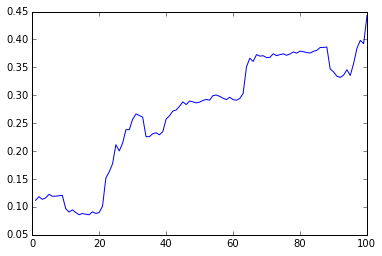

In [174]:
create_mtr_graph(calc_baseline, calc_baseline, MARS = 1, weights = weighted, tab = 'c00100', kids_less_or_equal=0)

##### IIT

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


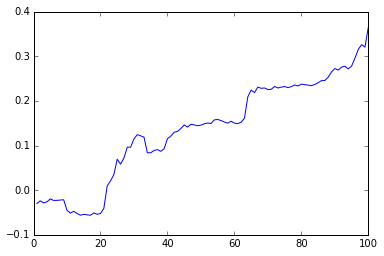

In [175]:
create_mtr_graph(calc_baseline, calc_baseline, MARS = 1, weights = weighted, tab = 'c00100', kids_less_or_equal=0, combined_or_IIT='IIT')

### Real data, current law policy, joint filers, >=1 kids

##### FICA + IIT

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


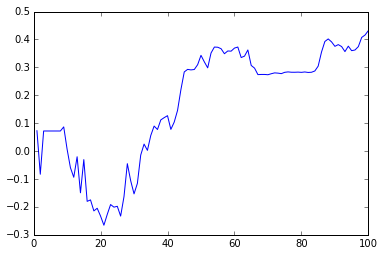

In [176]:
create_mtr_graph(calc_baseline, calc_baseline, MARS = 2, weights = weighted, tab = 'c00100', kids_greater_or_equal=1)

##### IIT

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


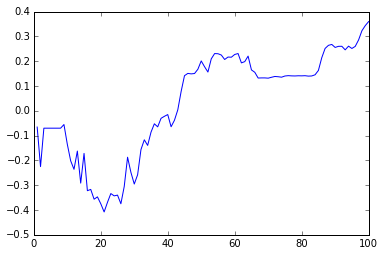

In [177]:
create_mtr_graph(calc_baseline, calc_baseline, MARS = 2, weights = weighted, tab = 'c00100', kids_greater_or_equal=1, combined_or_IIT='IIT')

#### Std Reform
#### Single

##### FICA + IIT

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


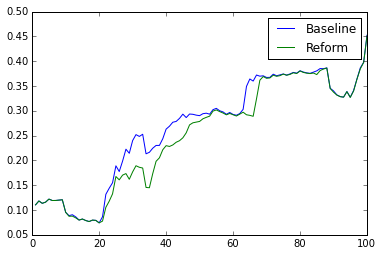

In [178]:
create_mtr_graph(calc_x, calc_y_std, MARS = 1, weights = weighted, tab = 'c00100')

##### IIT

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


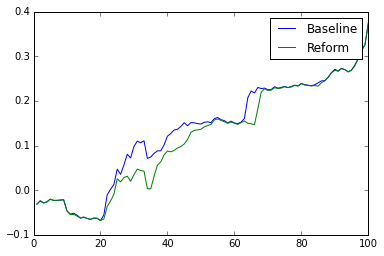

In [179]:
create_mtr_graph(calc_x, calc_y_std, MARS = 1, weights = weighted, tab = 'c00100', combined_or_IIT='IIT')

#### Joint

##### FICA + IIT

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


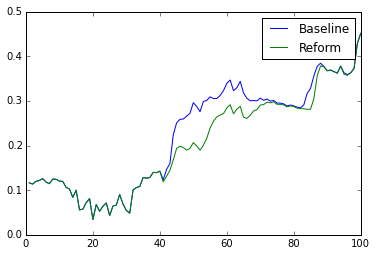

In [180]:
create_mtr_graph(calc_x, calc_y_std, MARS=2,  weights = weighted, tab = 'c00100')

##### IIT

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


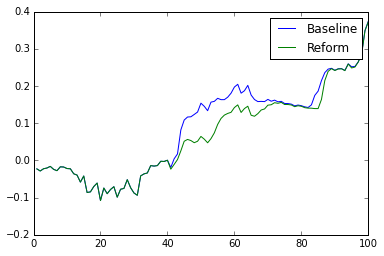

In [181]:
create_mtr_graph(calc_x, calc_y_std, MARS=2,  weights = weighted, tab = 'c00100', combined_or_IIT='IIT')

#### Rates reform
#### Single

##### FICA + IIT

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


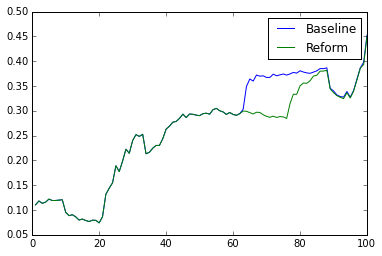

In [182]:
create_mtr_graph(calc_x, calc_y_rates, MARS=1,  weights = weighted, tab = 'c00100')

##### IIT

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


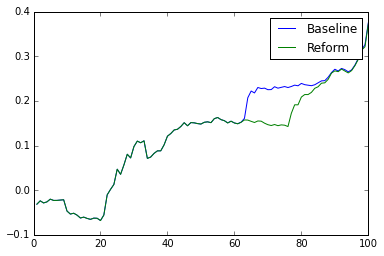

In [183]:
create_mtr_graph(calc_x, calc_y_rates, MARS=1,  weights = weighted, tab = 'c00100', combined_or_IIT='IIT')

#### Joint

##### FICA + IIT

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


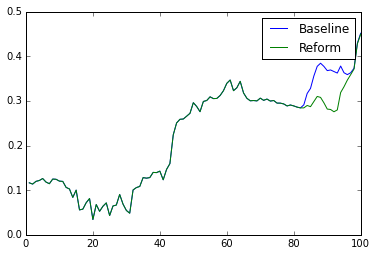

In [184]:
create_mtr_graph(calc_x, calc_y_rates, MARS=2,  weights = weighted, tab = 'c00100')

##### IIT

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


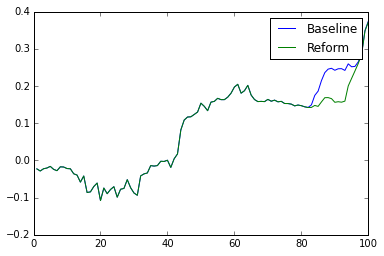

In [185]:
create_mtr_graph(calc_x, calc_y_rates, MARS=2,  weights = weighted, tab = 'c00100', combined_or_IIT='IIT')

#### Rates Low Reform
#### Single

##### FICA + IIT

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


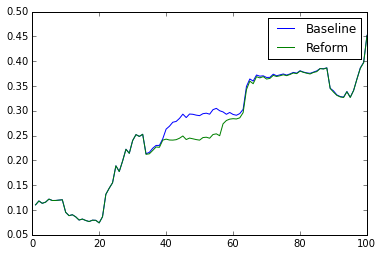

In [186]:
create_mtr_graph(calc_x, calc_y_rates_low, MARS=1, weights = weighted, tab = 'c00100')

##### IIT

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


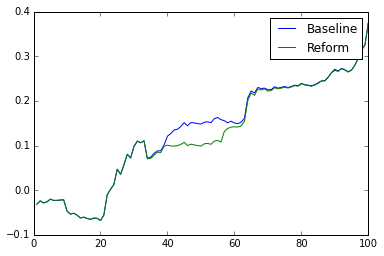

In [187]:
create_mtr_graph(calc_x, calc_y_rates_low, MARS=1, weights = weighted, tab = 'c00100', combined_or_IIT='IIT')

#### Joint

##### FICA + IIT

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


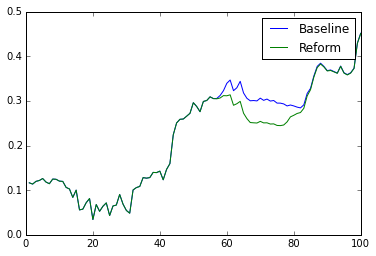

In [188]:
create_mtr_graph(calc_x, calc_y_rates_low, MARS=2, weights = weighted, tab = 'c00100')

##### IIT

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


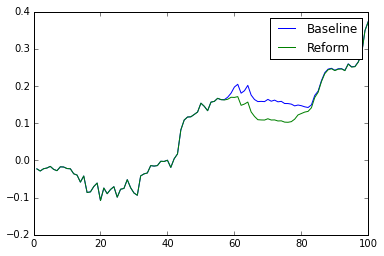

In [189]:
create_mtr_graph(calc_x, calc_y_rates_low, MARS=2, weights = weighted, tab = 'c00100', combined_or_IIT='IIT')

### PCT Diff ATR Chart, IIT + FICA

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


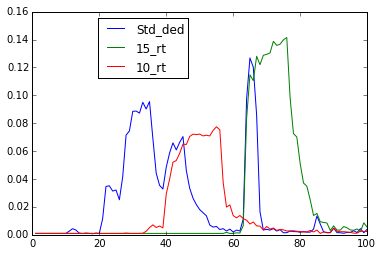

In [190]:
create_pct_diff_graph(calc_x, calc_y_std, calc_y_rates, calc_y_rates_low, MARS=1, weights= weighted, tab = 'c00100')

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


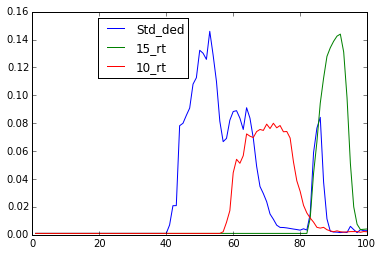

In [191]:
create_pct_diff_graph(calc_x, calc_y_std, calc_y_rates, calc_y_rates_low, MARS=2, weights= weighted, tab = 'c00100')

### percentiles of AGI, including dependents. Note that we are including negatives and nonfilers

In [192]:
def tab_income(calc, tab): 
    df = results(calc)
    df = add_income_bins(df, 100, tab)
    gp = df.groupby('bins', as_index=False)
    wdf = gp.apply(weighted, 'c00100')
    print_full(wdf[:])

In [193]:
tab_income(calc_x, tab = 'c00100')

0      -71460.424271
1        -103.937434
2           0.001000
3           0.001000
4           0.001000
5           0.001000
6           0.001000
7           0.002093
8          36.447018
9         351.840469
10        879.447198
11       1426.520659
12       1947.590252
13       2455.635987
14       2980.233812
15       3509.441471
16       4038.467778
17       4540.257226
18       5071.944165
19       5654.056466
20       6287.005603
21       6903.307327
22       7569.565345
23       8259.145159
24       8953.234352
25       9641.217595
26      10442.882582
27      11193.709217
28      11939.844621
29      12739.595249
30      13461.667626
31      14127.142661
32      14816.625342
33      15524.984412
34      16217.520214
35      16913.788437
36      17649.162528
37      18412.241006
38      19206.190262
39      20060.749860
40      20986.954168
41      21954.445180
42      23001.607340
43      24109.908735
44      25223.636620
45      26343.081169
46      27272.218322
47      28248

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


### percentiles of AGI, excluding dependents. Note that we are including negatives and nonfilers

In [194]:
RES_COLUMNS = STATS_COLUMNS + ['DSI']
def tab_income_noDep(calc, tab):
    df = results(calc)
    df = df[df.DSI!=1]
    df = add_income_bins(df, 100, tab)
    gp = df.groupby('bins', as_index=False)
    wdf = gp.apply(weighted, 'c00100')
    print_full(wdf[:])

In [195]:
tab_income_noDep(calc_x, tab = 'c00100')

0      -75494.079850
1         -13.699474
2           0.001000
3           0.001000
4           0.001000
5           0.001000
6           0.001000
7           0.001000
8          17.587180
9         286.943174
10        944.858629
11       1695.493381
12       2428.542282
13       3160.015936
14       3876.502480
15       4584.243202
16       5292.161462
17       6050.133754
18       6819.022357
19       7619.227724
20       8426.380051
21       9208.202113
22      10024.497486
23      10828.627550
24      11598.266234
25      12376.079223
26      13171.896185
27      13853.387105
28      14539.572722
29      15238.834952
30      15940.500042
31      16622.127440
32      17329.534378
33      18069.506390
34      18829.962301
35      19633.106466
36      20500.754343
37      21428.470275
38      22385.239593
39      23435.716687
40      24485.158883
41      25585.734379
42      26577.823899
43      27475.636862
44      28395.344733
45      29320.572342
46      30309.707413
47      31358

/Users/Matt.Jensen/anaconda/envs/taxcalc-dev/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
